In [24]:
from eeg_net.eeg_resnet import * 
from eeg_net.eeg_net_base import *
from eeg_net.eeg_rnn import * 
from eeg_net.eeg_cnn2 import *
from eeg_net.eeg_cnn import *
import numpy as np 
import matplotlib.pyplot as plt 
from torchsummary import summary
from eeg_net.solver import * 
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

X_test = np.load("data/X_test.npy")
y_test = np.load("data/y_test.npy")
person_train_valid = np.load("data/person_train_valid.npy")
X_train_valid = np.load("data/X_train_valid.npy")
y_train_valid = np.load("data/y_train_valid.npy")
person_test = np.load("data/person_test.npy")

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))
X_test_dir = './data/X_test.npy'
y_test_dir = './data/y_test.npy' 
X_train_valid_dir = './data/X_train_valid.npy' 
y_train_valid_dir = './data/y_train_valid.npy'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [28]:
model = EEGCNNc2(in_channels = 1, classes = 4)
summary(model.cuda(),(1,22,1000))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 50, 22, 976]           1,300
          Identity-2          [-1, 50, 22, 976]               0
            Conv2d-3          [-1, 50, 10, 976]           7,550
       BatchNorm2d-4          [-1, 50, 10, 976]             100
            Conv2d-5          [-1, 80, 10, 952]         100,080
       BatchNorm2d-6          [-1, 80, 10, 952]             160
          Identity-7          [-1, 80, 10, 952]               0
         MaxPool2d-8          [-1, 80, 10, 476]               0
            Linear-9              [-1, 476, 40]          32,040
         Identity-10              [-1, 476, 40]               0
        AvgPool2d-11               [-1, 62, 40]               0
           Linear-12                    [-1, 4]           9,924
          Softmax-13                    [-1, 4]               0
Total params: 151,154
Trainable params:

In [47]:
model = EEGCNNv2Encoder(in_channels=1) 
summary(model.cuda(),(1,22,1000))
print(model.output_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 50, 22, 976]           1,300
       BatchNorm2d-2          [-1, 50, 22, 976]             100
          Identity-3          [-1, 50, 22, 976]               0
            Conv2d-4          [-1, 50, 10, 976]           7,550
       BatchNorm2d-5          [-1, 50, 10, 976]             100
          Identity-6          [-1, 50, 10, 976]               0
            Conv2d-7          [-1, 80, 10, 952]         100,080
       BatchNorm2d-8          [-1, 80, 10, 952]             160
          Identity-9          [-1, 80, 10, 952]               0
        MaxPool2d-10          [-1, 80, 10, 476]               0
Total params: 109,290
Trainable params: 109,290
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.08
Forward/backward pass size (MB): 56.08
Params size (MB): 0.42
Estimated 

In [66]:
encoder_opt = {
    'gate_conv_size': 30,
    'gate_conv_out_channel': 60,
    'prob_conv_size': 2,
    'feature_conv_size': 15,
    'feature_conv_out_channel': 120,
    'feature_pool_size': 3,
    'activation': 'elu',
}
odel = EEGCNNv2(in_channels=1,classes=4,encoder_opt=encoder_opt).cuda() 
summary(model.cuda(),(1,22,1000))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 60, 22, 971]           1,860
       BatchNorm2d-2          [-1, 60, 22, 971]             120
               ELU-3          [-1, 60, 22, 971]               0
            Conv2d-4          [-1, 60, 11, 971]           7,260
       BatchNorm2d-5          [-1, 60, 11, 971]             120
               ELU-6          [-1, 60, 11, 971]               0
            Conv2d-7         [-1, 120, 11, 957]         108,120
       BatchNorm2d-8         [-1, 120, 11, 957]             240
               ELU-9         [-1, 120, 11, 957]               0
        MaxPool2d-10         [-1, 120, 11, 319]               0
  EEGCNNv2Encoder-11         [-1, 120, 11, 319]               0
           Linear-12              [-1, 319, 40]          52,840
         Identity-13              [-1, 319, 40]               0
        AvgPool2d-14               [-1,

In [64]:
encoder_opt = {
    'gate_conv_size': 30,
    'gate_conv_out_channel': 60,
    'prob_conv_size': 2,
    'feature_conv_size': 15,
    'feature_conv_out_channel': 120,
    'feature_pool_size': 3,
    'activation': 'elu',
}
model = EEGCNNv2Encoder(in_channels=1,options=encoder_opt) 
summary(model.cuda(),(1,22,1000))
print(model.output_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 60, 22, 971]           1,860
       BatchNorm2d-2          [-1, 60, 22, 971]             120
               ELU-3          [-1, 60, 22, 971]               0
            Conv2d-4          [-1, 60, 11, 971]           7,260
       BatchNorm2d-5          [-1, 60, 11, 971]             120
               ELU-6          [-1, 60, 11, 971]               0
            Conv2d-7         [-1, 120, 11, 957]         108,120
       BatchNorm2d-8         [-1, 120, 11, 957]             240
               ELU-9         [-1, 120, 11, 957]               0
        MaxPool2d-10         [-1, 120, 11, 319]               0
Total params: 117,720
Trainable params: 117,720
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.08
Forward/backward pass size (MB): 76.13
Params size (MB): 0.45
Estimated 

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.367306
0	1.381067	0.285125	1.372343	0.321513	
--Iter 49	1.371890
1	1.359946	0.326735	1.358000	0.321513	
--Iter 49	1.317418
2	1.331961	0.391509	1.365277	0.319149	
--Iter 49	1.264547
3	1.311167	0.422507	1.321807	0.423168	
--Iter 49	1.337711
4	1.286117	0.466307	1.305677	0.406619	
--Iter 49	1.239869
5	1.264976	0.501937	1.300048	0.413712	
--Iter 49	1.210784
6	1.241316	0.530492	1.276661	0.463357	
--Iter 49	1.187076
7	1.233267	0.544306	1.286698	0.458629	
--Iter 49	1.267209
8	1.219739	0.548012	1.263884	0.449173	
--Iter 49	1.151768
9	1.201006	0.574545	1.264206	0.449173	
--Iter 49	1.206530
10	1.184280	0.614218	1.227830	0.522459	
--Iter 49	1.195366
11	1.170528	0.623063	1.246643	0.465721	
--Iter 49	1.179100
12	1.158355	0.638730	1.226816	0.550827	
--Iter 49	1.075951
13	1.146241	0.644626	1.213484	0.527187	
--Iter 49	1.208137
14	1.137341	0.654734	1.210401	0.539007	
--Iter 49	1.219674
15	1.129315	0.670232	1.200493	0.565012	
-

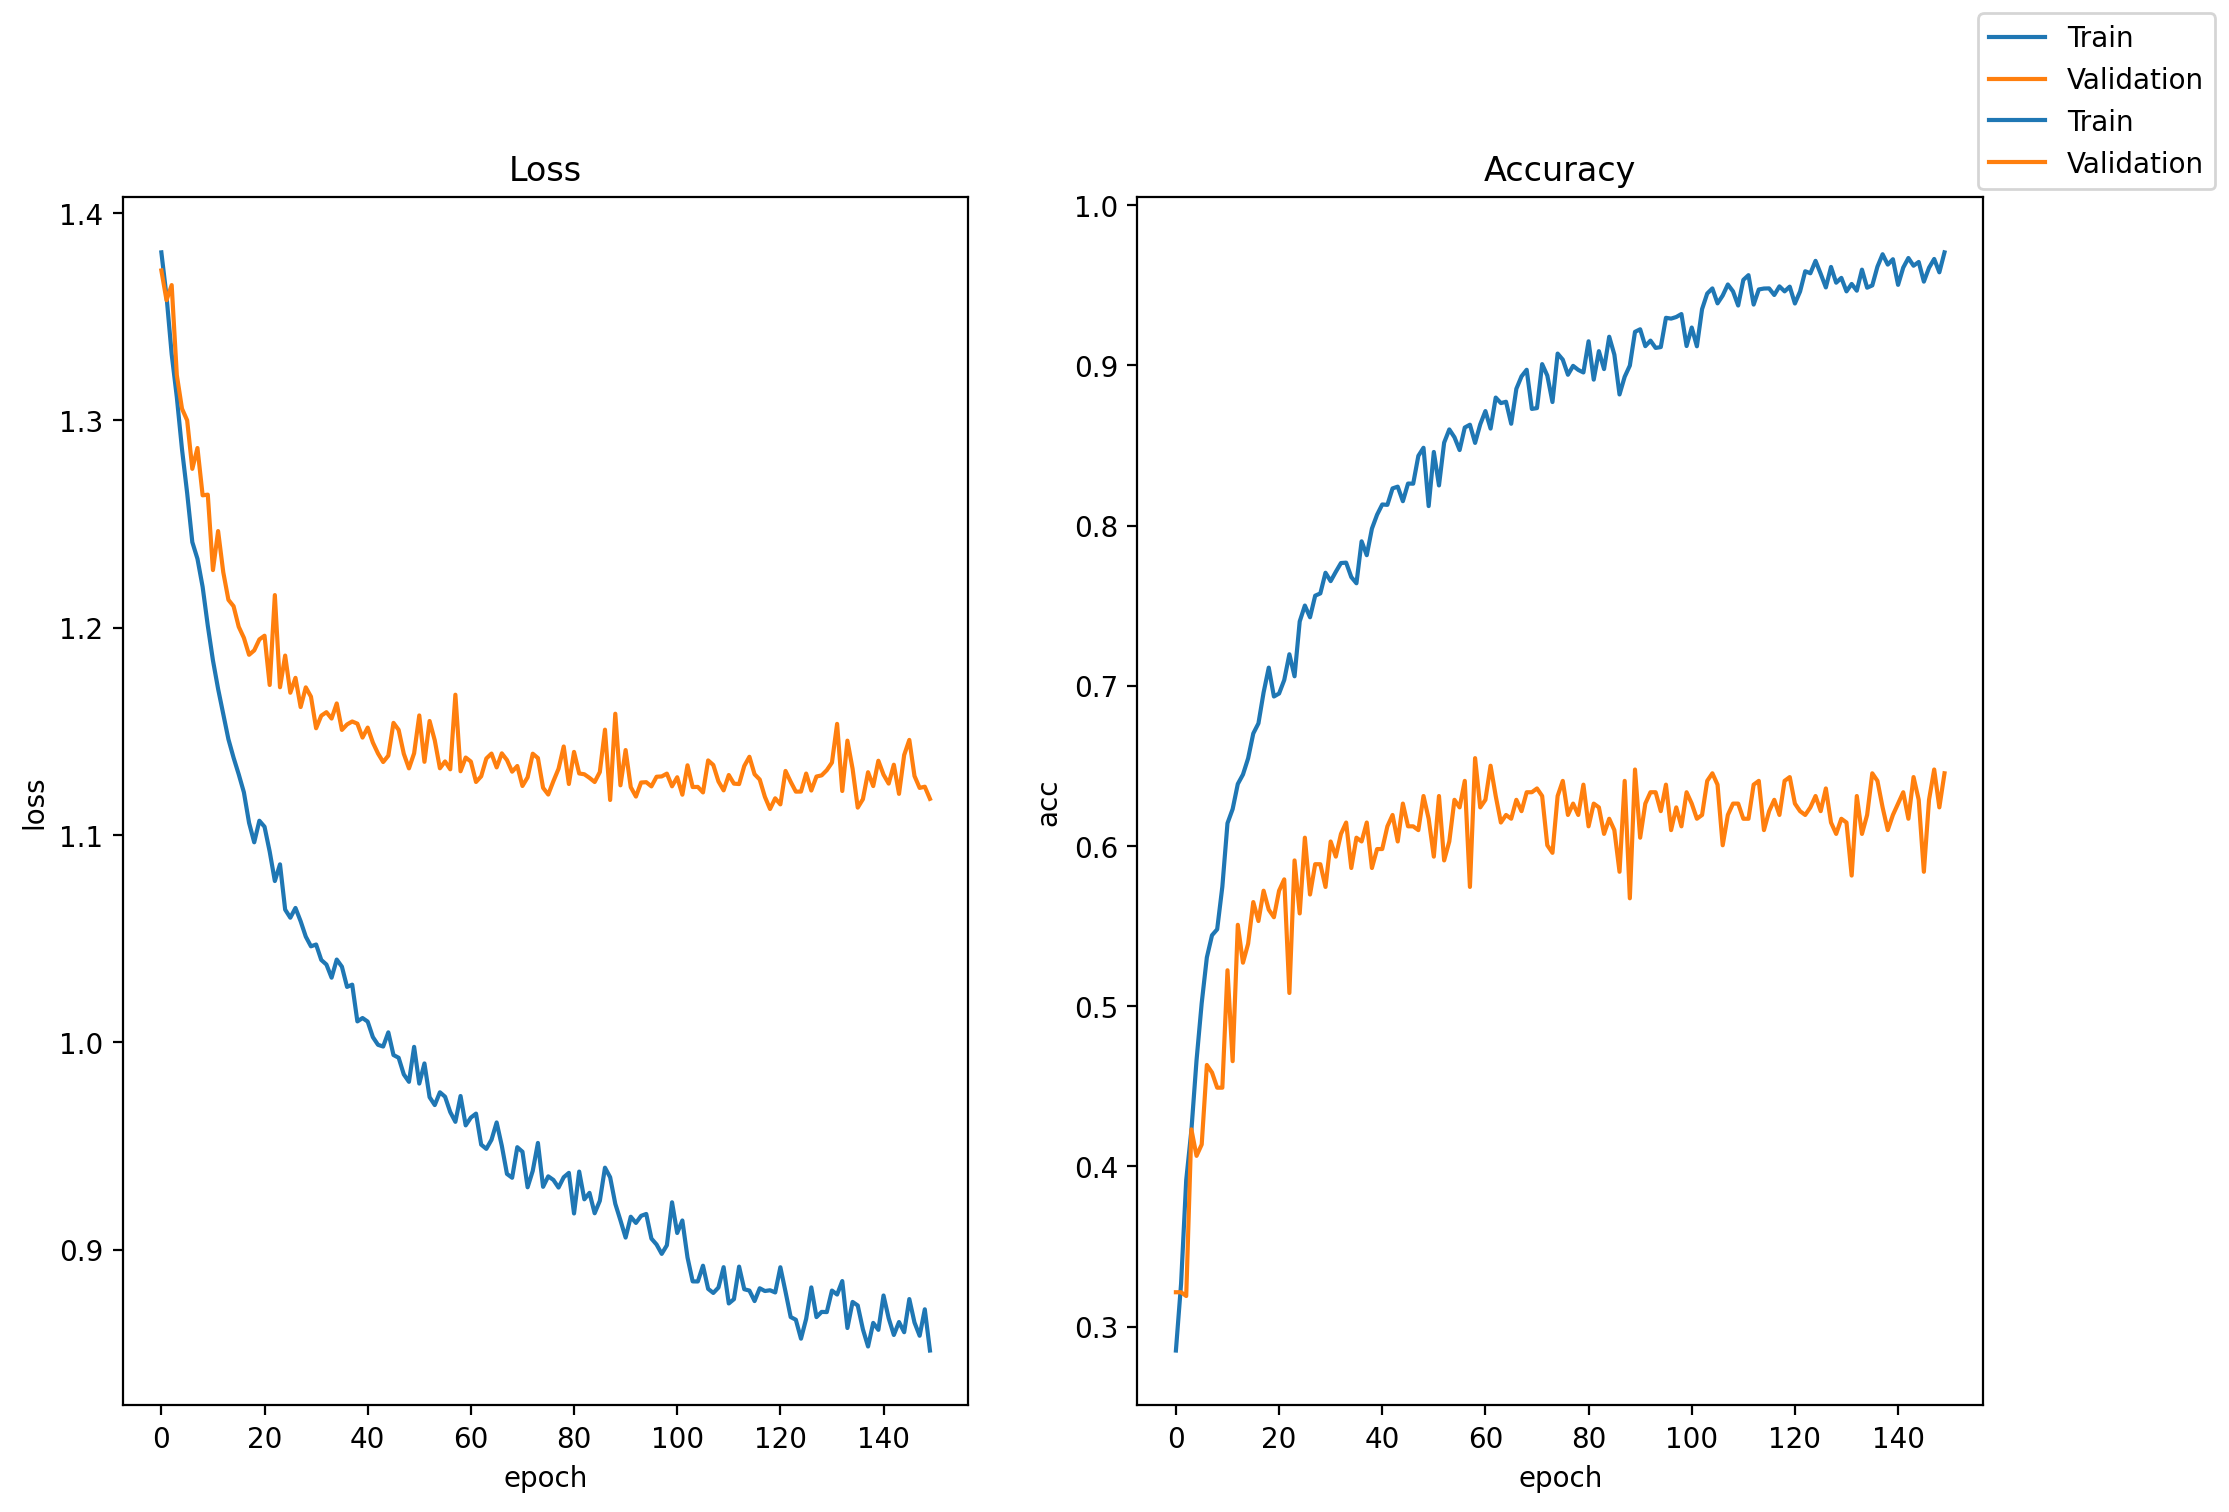

In [67]:
encoder_opt = {
    'gate_conv_size': 30,
    'gate_conv_out_channel': 60,
    'prob_conv_size': 2,
    'feature_conv_size': 15,
    'feature_conv_out_channel': 120,
    'feature_pool_size': 3,
    'activation': 'elu',
}
model = EEGCNNv2(1,4,encoder_opt=encoder_opt).to('cuda')

options = {
    'train_batch_size': 32,
    'scheduler_patience': 100,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 150,
}
train_val_data = eeg_train_val_loader(
    X_train_valid_dir, y_train_valid_dir)
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)

In [68]:
max_val = np.max(logs['val_acc'])
print('The maximum of the validation is: {}'.format(max_val))

The maximum of the validation is: 0.6548463356973995


## Parameter adjsut 


In [69]:
torch.cuda.empty_cache() 

In [ ]:
encoder_parm = {
    'gate_conv_sizes':[7,15,31],
    'gate_conv_out_channel':[16,32,64],
    'prob_conv_size':[3,6],
    'prob_down_sample':[2,3],
    'feature_conv_size':[7,15,31],
    'feature_conv_out_channel':[32,64],
    'feature_pool_type':['max','avg'],
    'feature_pool_size':[2,4,6],
    'activation': ['none','elu'],
}



### Activation 


Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.416689
0	1.397087	0.253454	1.400906	0.250591	
--Iter 49	1.359018
1	1.379855	0.284872	1.374995	0.281324	
--Iter 49	1.364833
2	1.365821	0.331873	1.358694	0.375887	
--Iter 49	1.320843
3	1.356154	0.362365	1.381906	0.276596	
--Iter 49	1.370545
4	1.353645	0.356722	1.350031	0.356974	
--Iter 49	1.335422
5	1.336272	0.384518	1.337708	0.397163	
--Iter 49	1.332831
6	1.321168	0.431772	1.327043	0.416076	
--Iter 49	1.254384
7	1.312743	0.418127	1.311434	0.444444	
--Iter 49	1.293952
8	1.299190	0.452914	1.300968	0.463357	
--Iter 49	1.387512
9	1.284885	0.472204	1.310346	0.387707	
--Iter 49	1.235348
10	1.265256	0.516678	1.287614	0.418440	
--Iter 49	1.139188
11	1.261897	0.498484	1.280524	0.465721	
--Iter 49	1.215318
12	1.253505	0.506402	1.308568	0.390071	
--Iter 49	1.205393
13	1.255615	0.500000	1.274188	0.482270	
--Iter 49	1.175800
14	1.232122	0.540768	1.269243	0.470449	
--Iter 49	1.207530
15	1.231962	0.538241	1.261833	0.482270	
-

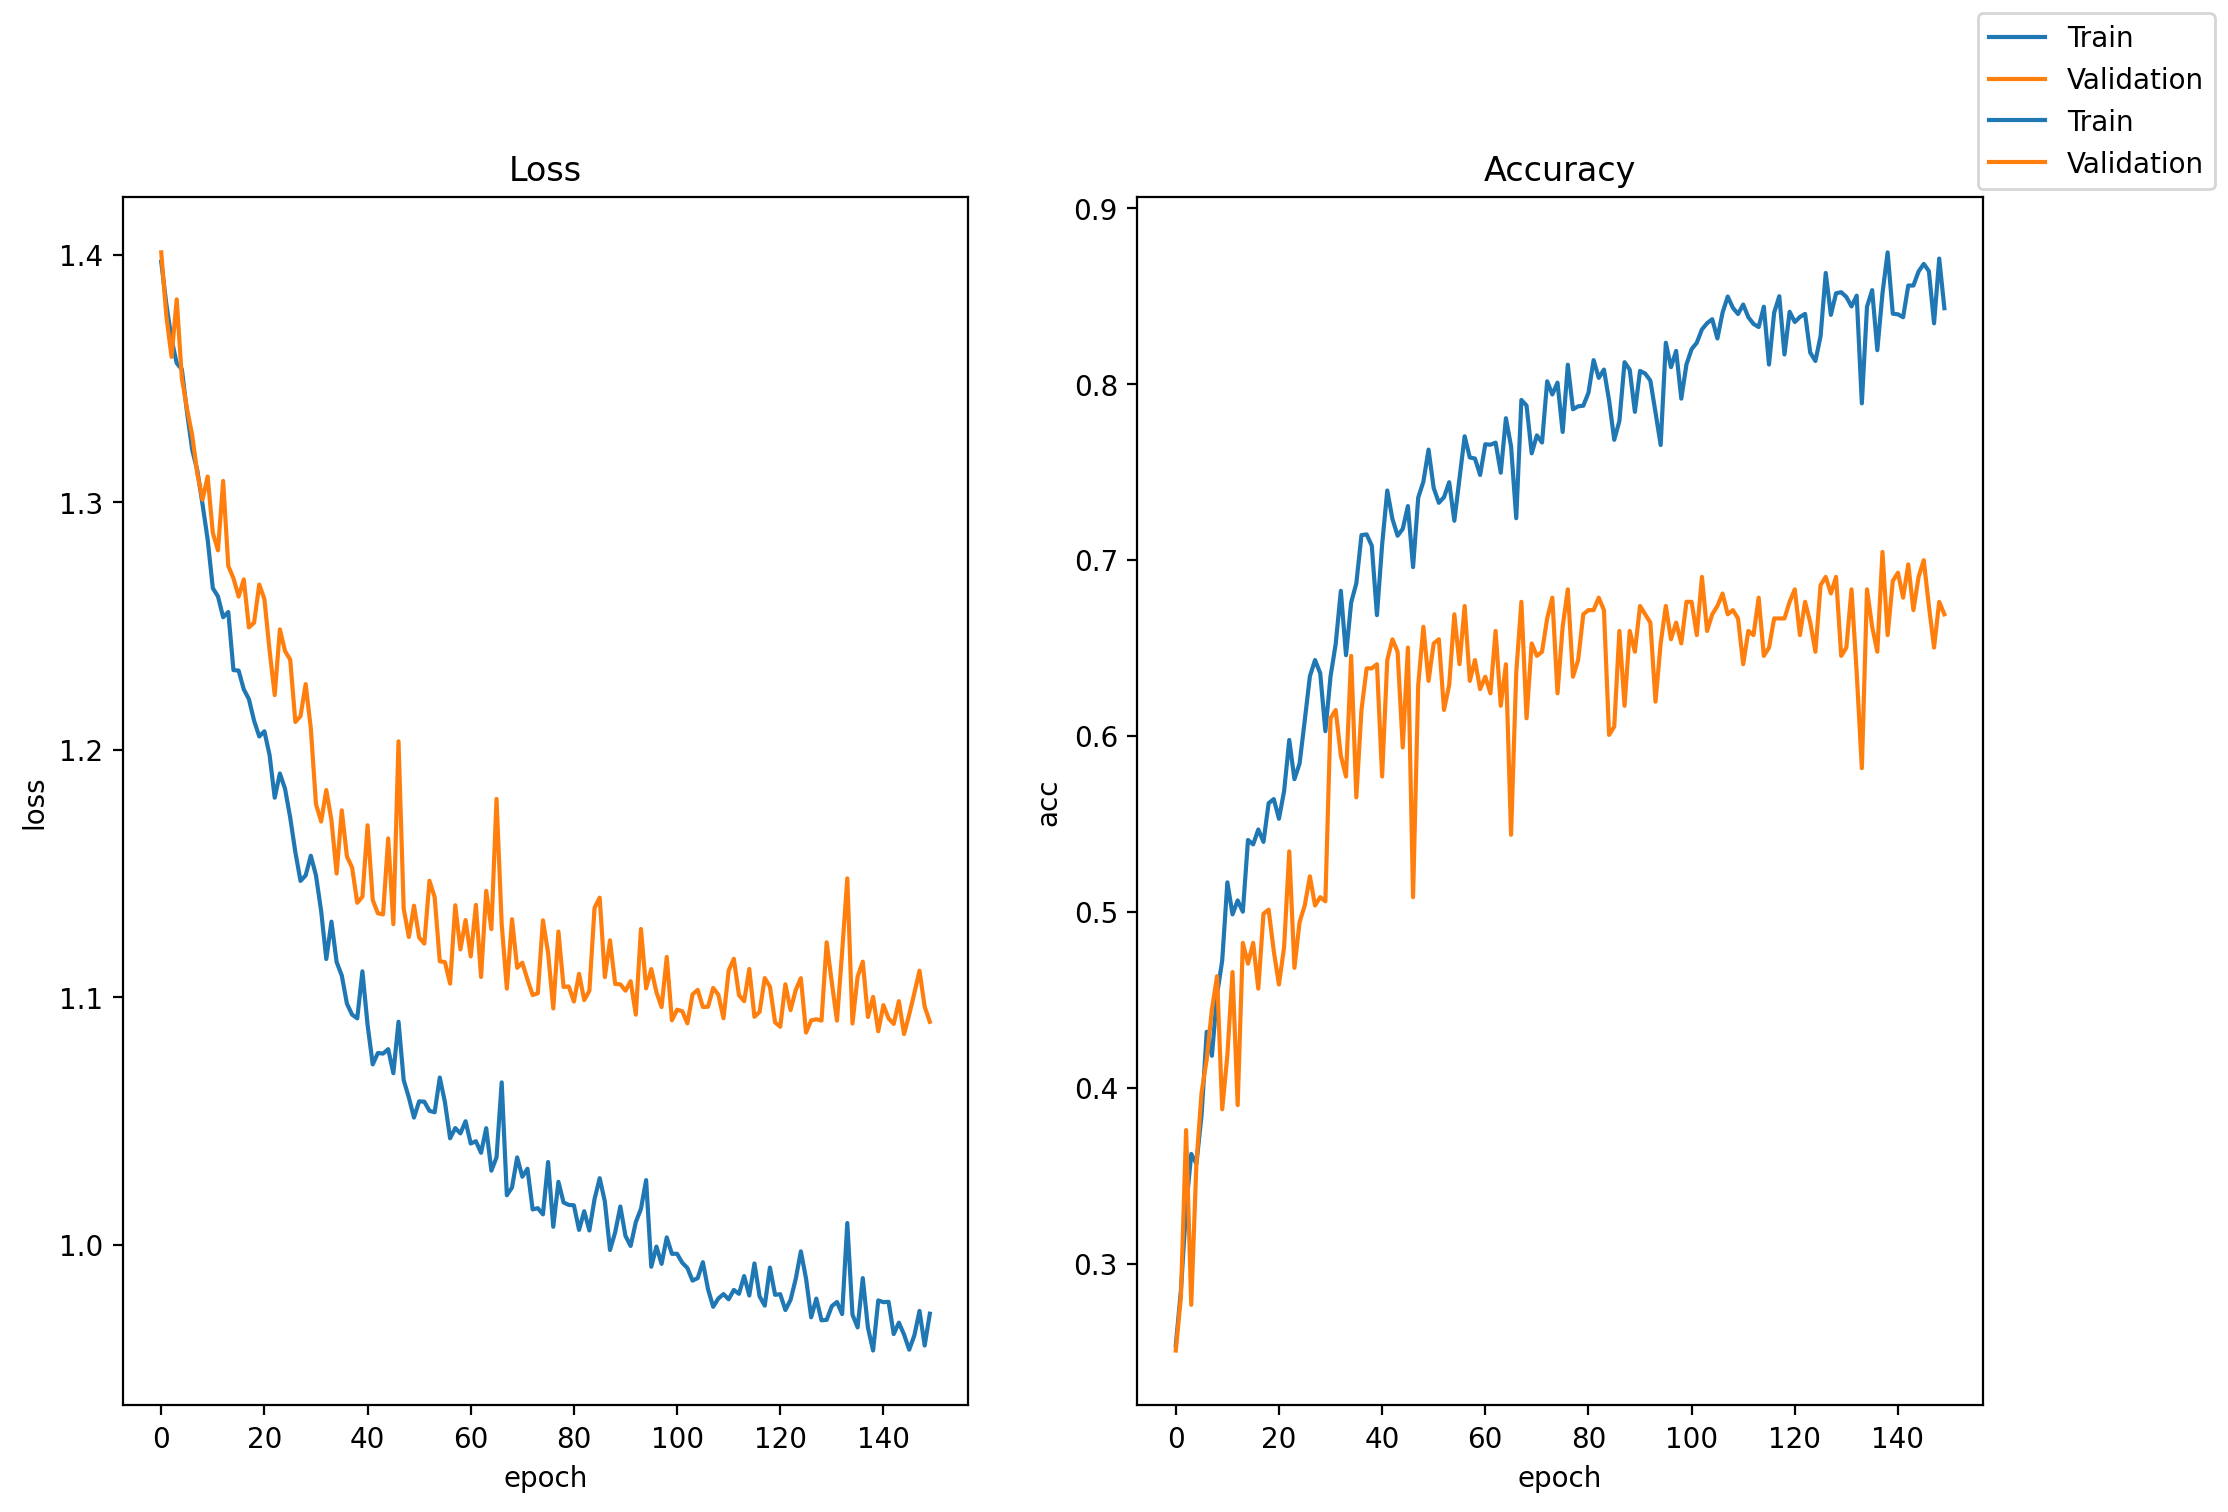

current max val_acc:0.7044917257683215 with param:(7, 30, 3, 2, 7, 32, 'max', 2, 'none')
{'param': [(7, 30, 3, 2, 7, 32, 'max', 2, 'none')], 'val_acc': [0.7044917257683215]}


In [27]:

encoder_parm = {
    'gate_conv_sizes':[7,15,31],
    'gate_conv_out_channel':[30,60],
    'prob_conv_size':[3,6],
    'prob_down_sample':[2,3],
    'feature_conv_size':[7,31],
    'feature_conv_out_channel':[32,64],
    'feature_pool_type':['max','avg'],
    'feature_pool_size':[2,6],
    'activation': ['none','elu'],
}
train_options = {
    'train_batch_size': 32,
    'scheduler_patience': 100,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-4,
    'epoch_num': 150,
}
model = EEGCNNv2
solver = EEGCNN_solver(model,data_dir=X_train_valid_dir,label_dir=y_train_valid_dir,model_encoder_opt=encoder_parm,train_opt=train_options)
params_log = solver.solve_param()
print(params_log)